# Building a neural network from scratch

## For this project, we are going to build a neural network using the Iris Dataset.

#### First, let's import our dataset :

['Iris-versicolor' 'Iris-virginica']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000271D39A7550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000271D3A2D7B8>]], dtype=object)

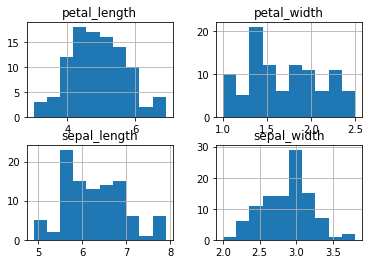

In [116]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

# Read in dataset
iris = pandas.read_csv("iris.csv")

# shuffle rows
shuffled_rows = np.random.permutation(iris.index)
iris = iris.loc[shuffled_rows,:]

# There are 2 species
print(iris.species.unique())
iris.hist()

The relationship between the features and target is not linear. Like in the example below, we can't fit a linear model.

![Google logo](https://dq-content.s3.amazonaws.com/l92oKZd.png "google logo")

## Neural networks

Neither a linear model nor logistic model is capable of building such a function, so we must explore other options like neural networks. Neural networks are very loosely inspired by the structure of neurons in the human brain. These models are built by using a series of activation units, known as neurons, to make predictions of some outcome. Neurons take in some input, apply a transformation function, and return an output. Below we see a representation of a neuron.

This neuron is taking in 5 units represented as x, a bias unit, and 4 features. This bias unit (1) is similar in concept to the intercept in linear regression and it will shift the activity of the neuron to one direction or the other. These units are then fed into an activation function h. We will use the popular sigmoid activation function because it returns values between 0 and 1 and can be treated as probabilities.

$\text{Sigmoid Function: }g(z) = \dfrac{1}{1 + e^{-z}}$

This sigmoid function then leads to the corresponding activation function:

$\text{Sigmoid Activation Function: }h_{\Theta}(x) = \dfrac{1}{1+e^{-\Theta^T x}} = \dfrac{1}{1+e^{-(\theta_01 + \theta_1x_1 + \theta_2 x_2)}}$

There are other activation functions aswell : 

#### The ReLu : A(x) = max(0,x)

#### The TanH (which is just a scaled version of the sigmoid) : ![Google logo](https://cdn-images-1.medium.com/max/1600/1*WNTLbBRWFiHPoXvyZ6s9eg.png "google logo") 

Let's use the sigmoid function for now and create a sigmoid activation function.

## Activation (feedforward) function 

In [125]:
z = np.asarray([[9, 5, 4]])
y = np.asarray([[-1, 2, 4]])

# Variables to test sigmoid_activation
iris["ones"] = np.ones(iris.shape[0])
X = iris[['ones', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = (iris.species == 'Iris-versicolor').values.astype(int)

# The first observation
x0 = X[0]

# Initialize thetas randomly 
theta_init = np.random.normal(0,0.01,size=(5,1))

def sigmoid_activation(x, theta):
    x = np.asarray(x)
    theta = np.asarray(theta)
    #the sigmoid function :
    return 1 / (1 + np.exp(-np.dot(theta.T, x)))
                
a1 = sigmoid_activation(x0, theta_init)

## Did our model learn good ? (The cost function) 

We can train a neuron using a logistic regression and gradient descent for minimizing a cost function which measures the error in our model. The cost function measures the difference between the desired output and actual output for each parameter and is defined as:

$J(\Theta) = -\dfrac{1}{m} \sum_{i=1}^{m} (y_i * log(h_{\Theta}(x_i)) + (1-y_i) log(1-h_{\Theta}(x_i)))$

Were $h_{\Theta}(x_i)$ represents our activation function for the current observation.

Let's compute the cost function for the first observation of the dataset.

In [154]:
# First observation's features and target
x0 = X[0]
y0 = y[0]

# Initialize parameters, we have 5 units and just 1 layer
theta_init = np.random.normal(0,0.01,size=(5,1))

def singlecost(X, y, theta):
    # Compute activation
    h = sigmoid_activation(X.T, theta)
    # Take the negative average of target*log(activation) + (1-target) * log(1-activation). We take the negative because the log
    #of a number between 0 & 1 is always negative
    cost = -np.mean(y * np.log(h) + (1-y) * np.log(1-h))
    return cost

first_cost = singlecost(x0, y0, theta_init)

## Optimizing the cost function & have less Sum of Squared Errors : get the gradients for each activation

To get the gradient for each activation, we must compute the overall error and then distribute that error to each parameter. To compute the gradient we must compute the partial derivative for each parameter. The partial derivative is computed as : 

$\dfrac{\partial J}{\partial \theta_j} = \dfrac{\partial J}{\partial h(\Theta)} \dfrac{\partial h(\Theta)}{\partial \theta_j}$

where the first part is computing the error between the target variable and prediction. The second part then computes the sensitivity relative to each parameter. In the end, the gradients are computed as: 

$\delta = (y_i - h_\Theta(x_i)) * h_\Theta(x_i) * (1-h_\Theta(x_i)) * x_i$

where $(y_i - h_\Theta(x_i))$, a scalar, is the error between the true observation and the prediction. $h_\Theta(x_i) * (1-h_\Theta(x_i)) * x_i$ is also a scalar and is the sensitivity of the activation function.

The result of this computation, $\delta$, is a vector of 5 units (1 biais + 4 outputs).

In [158]:
# Initialize parameters
theta_init = np.random.normal(0,0.01,size=(5,1))

# Store the updates into this array
grads = np.zeros(theta_init.shape)

# Number of observations 
n = X.shape[0]

for i, obs in enumerate(X):
    #compute the prediction
    y_pred = sigmoid_activation(obs, theta_init)
    #compute the error between prediction and true value
    error = y[i] - y_pred
    #compute the sensitivity of the activation function
    sensitivity = y_pred * (1 - y_pred) * obs
    #compute dela, our 5-unit vectors for each 4 feature + 1 biais
    delta = error * sensitivity
    #get the sum of the deltas and average it by the number of observations
    grads = grads + delta[:,np.newaxis] / X.shape[0]

## Minimizing the error : descending the gradient

Now that you can compute the gradients, use gradient descent to learn the parameters and predict the species of iris flower given the 4 features. Gradient descent minimizes the cost function by adjusting the parameters accordingly. Adjust the parameters by adding the product of the gradients and the learning rate from the previous parameters. Repeat until the cost function converges or a maximum number of iterations is reached.

The high level algorithm is,

    while (number_of_iterations < max_iterations and (prev_cost - cost) > convergence_thres ):
    update paramaters
    get new cost
    repeat

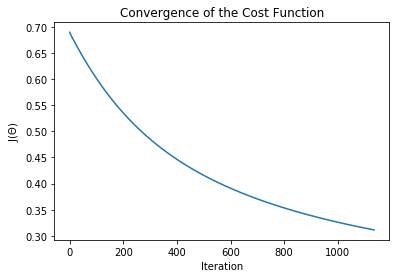

In [159]:
theta_init = np.random.normal(0,0.01,size=(5,1))

# set a learning rate
learning_rate = 0.1
# maximum number of iterations for gradient descent
maxepochs = 10000       
# costs convergence threshold, ie. (prevcost - cost) > convergence_thres
convergence_thres = 0.0001  

def learn(X, y, theta, learning_rate, maxepochs, convergence_thres):
    costs = []
    cost = singlecost(X, y, theta)  # compute initial cost
    costprev = cost + convergence_thres + 0.01  # set an inital costprev to past while loop
    counter = 0  # add a counter
    # Loop through until convergence
    for counter in range(maxepochs):
        grads = np.zeros(theta.shape)
        for j, obs in enumerate(X):
            h = sigmoid_activation(obs, theta)   # Compute activation
            delta = (y[j]-h) * h * (1-h) * obs   # Get delta
            grads += delta[:,np.newaxis]/X.shape[0]  # accumulate
        
        # update parameters 
        theta += grads * learning_rate
        counter += 1  # count
        costprev = cost  # store prev cost
        cost = singlecost(X, y, theta) # compute new cost
        costs.append(cost)
        if np.abs(costprev-cost) < convergence_thres:
            break
        
    plt.plot(costs)
    plt.title("Convergence of the Cost Function")
    plt.ylabel("J($\Theta$)")
    plt.xlabel("Iteration")
    plt.show()
    return theta
        
theta = learn(X, y, theta_init, learning_rate, maxepochs, convergence_thres)

## Adding a hidden layer to the network

Our model was quite simple so far since we has only two layers : an input and an output. Neural networks are usually built using multiple layers of neurons. Adding more layers into the network allows you to learn more complex functions. Here's a picture representing a 3 layer neural network.

![Google logo](https://dq-content.s3.amazonaws.com/J1Y6YEf.png) 

We have a 3 layer neural network with four input variables $x_1, x_2, x_3,\text{ and } x_4$ and a bias unit. Each variable and bias unit is then sent to four hidden units, $a_1^{(2)}, a_2^{(2)}, a_3^{(2)}, \text{ and } a_4^{(2)}$. The hidden units have different sets of parameters θ.

$a_1^{(2)} = g(\theta_{1,0}^{(1)} + \theta_{1,1}^{(1)} x_1 + \theta_{1,2}^{(1)} x_2 + \theta_{1,3}^{(1)} x_3 + \theta_{1,4}^{(1)} x_4)$

$a_2^{(2)} = g(\theta_{2,0}^{(1)} + \theta_{2,1}^{(1)} x_1 + \theta_{2,2}^{(1)} x_2 + \theta_{2,3}^{(1)} x_3 + \theta_{2,4}^{(1)} x_4)$

$a_3^{(2)} = g(\theta_{3,0}^{(1)} + \theta_{3,1}^{(1)} x_1 + \theta_{3,2}^{(1)} x_2 + \theta_{3,3}^{(1)} x_3 + \theta_{3,4}^{(1)} x_4)$

$a_4^{(2)} = g(\theta_{4,0}^{(1)} + \theta_{4,1}^{(1)} x_1 + \theta_{4,2}^{(1)} x_2 + \theta_{4,3}^{(1)} x_3 + \theta_{4,4}^{(1)} x_4)$7


$\theta_{i,k}^{(j)}$ represents the parameter of input unit **k** which transform the units in layer **j** to activation unit $a_i^{(j+1)}$.

This layer is known as a hidden layer because the user does not directly interact with it by passing or retrieving data. The third and final layer is the output, or prediction, of our model. Similar to how each variable was sent to each neuron in the hidden layer, the activation units in each neuron are then sent to each neuron on the next layer. This action is called feedforwarding. Since there is only a single layer, we can write it as:

$h_{\Theta}(X) = g(\theta_{1,0}^{(2)} + \theta_{1,1}^{(2)} a_1^{(2)} + \theta_{1,2}^{(2)} a_2^{(2)} + \theta_{1,3}^{(2)} a_3^{(2)} + \theta_{1,4}^{(2)} a_4^{(2)})$

While the mathematical notation may seem confusing at first, at a high level, we are organizing multiple logistic regression models to create a more complex function.

Let's write a function feedforward() that will take in an input X and two sets of parameters theta0 and theta1 to compute the output $h_{\Theta}(X)$.

In [160]:
#Initialize our theta parameters

theta0_init = np.random.normal(0,0.01,size=(5,4))
theta1_init = np.random.normal(0,0.01,size=(5,1))

def feedforward(X, theta0, theta1):
    # feedforward to the first layer
    a1 = sigmoid_activation(X.T, theta0).T
    # add a column of ones for bias term
    a1 = np.column_stack([np.ones(a1.shape[0]), a1])
    # activation units are then inputted to the output layer
    out = sigmoid_activation(a1.T, theta1)
    return out

h = feedforward(X, theta0_init, theta1_init)

## The cost function for multiple layers

The cost function to multiple layer neural networks is identical to the cost function we used in the last screen. It is just that the activation function $h_{\Theta}(x_{i})$ is more complicated since we have multiple layers. Reminder of the cost function : 

$J(\Theta) = -\dfrac{1}{m} \sum_{i=1}^m (y_{i} * log(h_{\Theta}(x_{i}))  +  (1-y_{i}) log(1-h_{\Theta}(x_i))$

Let's compute the cost function of our mutli-layered network using randomly generated initial parameters :

In [161]:
theta0_init = np.random.normal(0,0.01,size=(5,4))
theta1_init = np.random.normal(0,0.01,size=(5,1))

def multiplecost(X,y,theta0_init,theta1_init):
    #feed the signal to the layer
    h = feedforward(X, theta0_init, theta1_init)
    #compute the error
    error = y * np.log(h) + (1 - y) * np.log(1 - h)
    return -np.mean(error)

c = multiplecost(X,y,theta0_init,theta1_init)

## Backpropagation

For computing our backpropagation algorithm, let's wrap our code in a class :

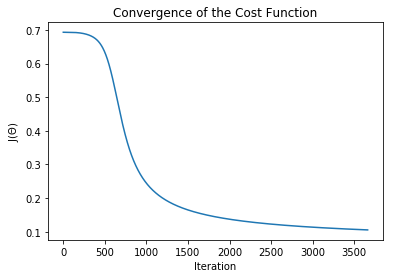

In [163]:
# Use a class for this model, it's good practice and condenses the code
class NNet3:
    def __init__(self, learning_rate=0.5, maxepochs=1e4, convergence_thres=1e-5, hidden_layer=4):
        self.learning_rate = learning_rate
        self.maxepochs = int(maxepochs)
        self.convergence_thres = 1e-5
        self.hidden_layer = int(hidden_layer)
        
    def _multiplecost(self, X, y):
        # feed through network
        l1, l2 = self._feedforward(X) 
        # compute error
        inner = y * np.log(l2) + (1-y) * np.log(1-l2)
        # negative of average error
        return -np.mean(inner)
    
    def _feedforward(self, X):
        # feedforward to the first layer
        l1 = sigmoid_activation(X.T, self.theta0).T
        # add a column of ones for bias term
        l1 = np.column_stack([np.ones(l1.shape[0]), l1])
        # activation units are then inputted to the output layer
        l2 = sigmoid_activation(l1.T, self.theta1)
        return l1, l2
    
    def predict(self, X):
        _, y = self._feedforward(X)
        return y
    
    def learn(self, X, y):
        nobs, ncols = X.shape
        self.theta0 = np.random.normal(0,0.01,size=(ncols,self.hidden_layer))
        self.theta1 = np.random.normal(0,0.01,size=(self.hidden_layer+1,1))
        
        self.costs = []
        cost = self._multiplecost(X, y)
        self.costs.append(cost)
        costprev = cost + self.convergence_thres+1  # set an inital costprev to past while loop
        counter = 0  # intialize a counter

        # Loop through until convergence
        for counter in range(self.maxepochs):
            # feedforward through network
            l1, l2 = self._feedforward(X)

            # Start Backpropagation
            # Compute gradients
            l2_delta = (y-l2) * l2 * (1-l2)
            l1_delta = l2_delta.T.dot(self.theta1.T) * l1 * (1-l1)

            # Update parameters by averaging gradients and multiplying by the learning rate
            self.theta1 += l1.T.dot(l2_delta.T) / nobs * self.learning_rate
            self.theta0 += X.T.dot(l1_delta)[:,1:] / nobs * self.learning_rate
            
            # Store costs and check for convergence
            counter += 1  # Count
            costprev = cost  # Store prev cost
            cost = self._multiplecost(X, y)  # get next cost
            self.costs.append(cost)
            if np.abs(costprev-cost) < self.convergence_thres and counter > 500:
                break

# Set a learning rate
learning_rate = 0.5
# Maximum number of iterations for gradient descent
maxepochs = 10000       
# Costs convergence threshold, ie. (prevcost - cost) > convergence_thres
convergence_thres = 0.00001  
# Number of hidden units
hidden_units = 4

# Initialize model 
model = NNet3(learning_rate=learning_rate, maxepochs=maxepochs,
              convergence_thres=convergence_thres, hidden_layer=hidden_units)
# Train model
model.learn(X, y)

# Plot costs
plt.plot(model.costs)
plt.title("Convergence of the Cost Function")
plt.ylabel("J($\Theta$)")
plt.xlabel("Iteration")
plt.show()

Now that we have learned about neural networks, learned about backpropagation, and have code which will train a 3-layer neural network, we will split the data into training and test datasets and run the model.

In [164]:
# First 70 rows to X_train and y_train
# Last 30 rows to X_test and y_test

X_train = X[:70]
y_train = y[:70]

X_test = X[-30:]
y_test = y[-30:]

To benchmark how well a three layer neural network performs when predicting the species of iris flowers, we have to compute the AUC, area under the curve, score of the receiver operating characteristic. The function NNet3 not only trains the model but also returns the predictions. The method predict() will return a 2D matrix of probabilities. Since there is only one target variable in this neural network, select the first row of this matrix, which corresponds to the type of flower.

In [165]:
from sklearn.metrics import roc_auc_score
# Set a learning rate
learning_rate = 0.5
# Maximum number of iterations for gradient descent
maxepochs = 10000       
# Costs convergence threshold, ie (prevcost - cost) > convergence_thres
convergence_thres = 0.00001  
# Number of hidden units
hidden_units = 4

# Initialize model 
model = NNet3(learning_rate=learning_rate, maxepochs=maxepochs,
              convergence_thres=convergence_thres, hidden_layer=hidden_units)
model.learn(X_train, y_train)

yhat = model.predict(X_test)[0]

auc = roc_auc_score(y_test, yhat)

In [166]:
auc

1.0